In [1]:
import pickle
import pandas as pd
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, label_binarize
from sklearn.metrics import classification_report, RocCurveDisplay, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import KFold, train_test_split, cross_validate, RepeatedStratifiedKFold, GridSearchCV
import numpy as np
from imblearn.combine import SMOTETomek, SMOTEENN
from collections import Counter
from imblearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline as make_imb_pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours, TomekLinks
import seaborn as sns
import sys
import pickle
sys.path.append('/Users/ayoucruz/Desktop/Data_Science/3nd_Semester/DATA7901 Capstone project/Capstone/Models/Functions')
from Evaluation import *
from Preparation import *

In [2]:
X, y, data = preparation_class_threshold()

/Users/ayoucruz/Desktop/Data_Science/3nd_Semester/DATA7901 Capstone project/Capstone/Models/Functions/Preparation.py:717: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_location = pd.read_csv('../../Dataset/Location.csv')


### Train Test Split

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
X_train.columns = [c.replace(' ', '_') for c in X_train.columns]
X_test.columns = [c.replace(' ', '_') for c in X_test.columns]

### Trainning Baseline

Best parameters: {'n_estimators': 100}
Best score:  0.620760826351803
-------------------------------------------------------------
Evaluation
Average training score:  0.6228569590765836
Average validation score:  0.620760826351803
Accuracy:  0.6203913409880965
Precision:  0.5573443598814547
Recall:  0.6203913409880965
F1-Score:  0.5001320057358215
--------------------------------------------
                 precision    recall  f1-score   support

          Fatal       0.25      0.00      0.00      1166
   Minor injury       0.40      0.00      0.00     10409
Property damage       0.49      0.07      0.12     17442
 Serious injury       0.63      0.98      0.76     46927

       accuracy                           0.62     75944
      macro avg       0.44      0.26      0.22     75944
   weighted avg       0.56      0.62      0.50     75944



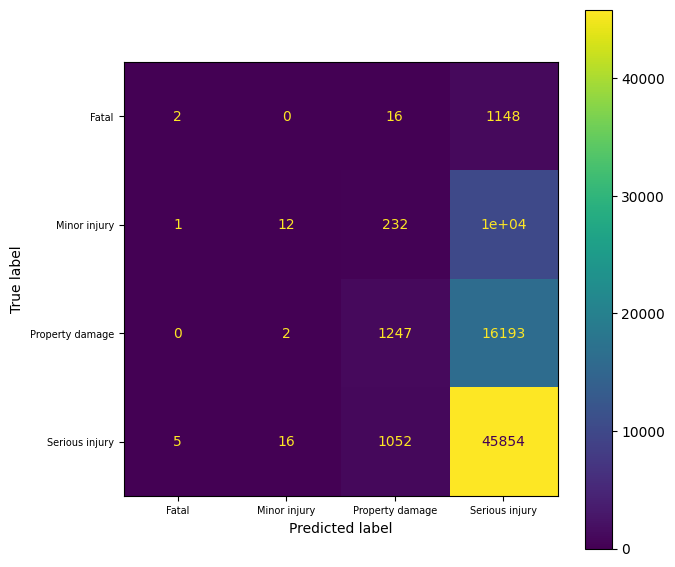

In [4]:
model = LGBMClassifier(n_jobs=-1, force_row_wise=True, verbose=0, random_state=42)
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=42)
param_grid = {
    'n_estimators': [100]
}
grid_search = GridSearchCV(model, param_grid, cv=rskf, scoring='accuracy', n_jobs=-1, verbose=0, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)
print("-------------------------------------------------------------")
print("Evaluation")
y_pred = grid_search.predict(X_test)
model_baseline = grid_search.best_estimator_
cv_results = grid_search.cv_results_
train_scores = cv_results['mean_train_score']
validation_scores = cv_results['mean_test_score']
print("Average training score: ", train_scores.mean())
print("Average validation score: ", validation_scores.mean())
evaluation_class_8(y_test, y_pred)
with open('Saved_models_remove/xgb_baseline.pkl', 'wb') as file:
    pickle.dump(model_baseline, file)

In [5]:
pipeline_smote = make_imb_pipeline(SMOTE(random_state=42), LGBMClassifier(n_jobs=-1, force_row_wise=True, verbose=0))
pipeline_smoteen = make_imb_pipeline(SMOTEENN(random_state=42), LGBMClassifier(n_jobs=-1, force_row_wise=True, verbose=0))
pipeline_tomek = make_imb_pipeline(SMOTETomek(random_state=42), LGBMClassifier(n_jobs=-1, force_row_wise=True, verbose=0))
pipeline_under = make_imb_pipeline(RandomUnderSampler(random_state=42), LGBMClassifier(n_jobs=-1, force_row_wise=True, verbose=0))

### SMOTE

Best parameters: {'lgbmclassifier__n_estimators': 100}
Best score:  0.42866736535274663
-------------------------------------------------------------
Evaluation
Average training score:  0.43296743732609927
Average validation score:  0.42866736535274663
Accuracy:  0.4180975455598862
Precision:  0.5221185598823613
Recall:  0.4180975455598862
F1-Score:  0.4493135217984895
--------------------------------------------
                 precision    recall  f1-score   support

          Fatal       0.07      0.34      0.12      1166
   Minor injury       0.20      0.35      0.25     10409
Property damage       0.34      0.41      0.37     17442
 Serious injury       0.67      0.44      0.53     46927

       accuracy                           0.42     75944
      macro avg       0.32      0.39      0.32     75944
   weighted avg       0.52      0.42      0.45     75944



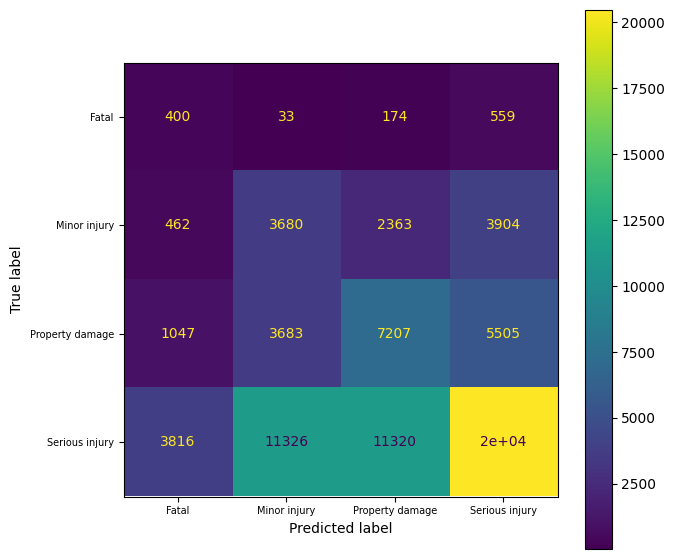

In [6]:
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=42)
param_grid = {
    'lgbmclassifier__n_estimators': [100]
}
grid_search = GridSearchCV(pipeline_smote, param_grid, cv=rskf, scoring='accuracy', n_jobs=-1, verbose=0, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)
print("-------------------------------------------------------------")
print("Evaluation")
y_pred = grid_search.predict(X_test)
model_smote = grid_search.best_estimator_
cv_results = grid_search.cv_results_
train_scores = cv_results['mean_train_score']
validation_scores = cv_results['mean_test_score']
print("Average training score: ", train_scores.mean())
print("Average validation score: ", validation_scores.mean())
evaluation_class_8(y_test, y_pred)
with open('Saved_models_remove/lgbm_smote.pkl', 'wb') as file:
    pickle.dump(model_smote, file)

### Undersampling

Best parameters: {'lgbmclassifier__n_estimators': 100}
Best score:  0.2646474215595357
-------------------------------------------------------------
Evaluation
Average training score:  0.2702230891242798
Average validation score:  0.2646474215595357
Accuracy:  0.2542136310965975
Precision:  0.5212956734076994
Recall:  0.2542136310965975
F1-Score:  0.2626863993547147
--------------------------------------------
                 precision    recall  f1-score   support

          Fatal       0.05      0.70      0.09      1166
   Minor injury       0.18      0.46      0.26     10409
Property damage       0.32      0.41      0.36     17442
 Serious injury       0.68      0.14      0.23     46927

       accuracy                           0.25     75944
      macro avg       0.31      0.43      0.23     75944
   weighted avg       0.52      0.25      0.26     75944



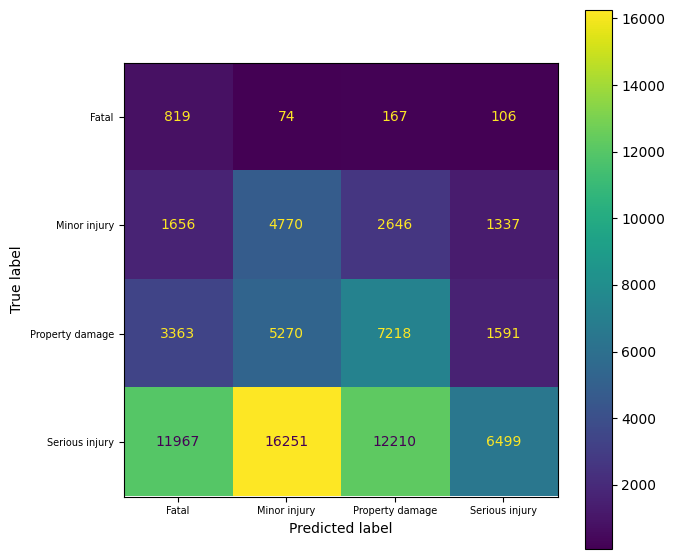

In [7]:
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=42)
param_grid = {
    'lgbmclassifier__n_estimators': [100]
}
grid_search = GridSearchCV(pipeline_under, param_grid, cv=rskf, scoring='accuracy', n_jobs=-1, verbose=0, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)
print("-------------------------------------------------------------")
print("Evaluation")
y_pred = grid_search.predict(X_test)
model_under = grid_search.best_estimator_
cv_results = grid_search.cv_results_
train_scores = cv_results['mean_train_score']
validation_scores = cv_results['mean_test_score']
print("Average training score: ", train_scores.mean())
print("Average validation score: ", validation_scores.mean())
evaluation_class_8(y_test, y_pred)
with open('Saved_models_remove/lgbm_undersampling.pkl', 'wb') as file:
    pickle.dump(model_under, file)

### SMOTEENN

Best parameters: {'lgbmclassifier__n_estimators': 100}
Best score:  0.5650121566842696
-------------------------------------------------------------
Evaluation
Average training score:  0.5712807856815085
Average validation score:  0.5650121566842696
Accuracy:  0.5703676393131781
Precision:  0.5019312434659221
Recall:  0.5703676393131781
F1-Score:  0.5163459704870663
--------------------------------------------
                 precision    recall  f1-score   support

          Fatal       0.11      0.21      0.14      1166
   Minor injury       0.18      0.04      0.07     10409
Property damage       0.36      0.20      0.26     17442
 Serious injury       0.63      0.83      0.72     46927

       accuracy                           0.57     75944
      macro avg       0.32      0.32      0.30     75944
   weighted avg       0.50      0.57      0.52     75944



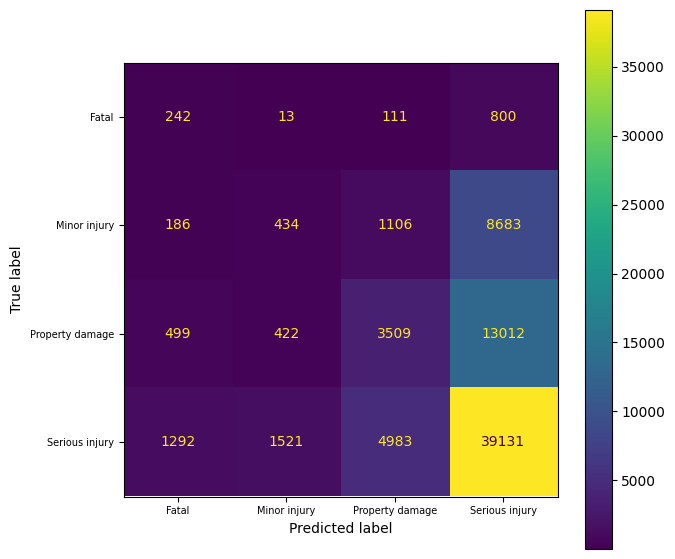

In [8]:
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=42)
param_grid = {
    'lgbmclassifier__n_estimators': [100]
}
grid_search = GridSearchCV(pipeline_smoteen, param_grid, cv=rskf, scoring='accuracy', n_jobs=-1, verbose=0, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)
print("-------------------------------------------------------------")
print("Evaluation")
y_pred = grid_search.predict(X_test)
model_smoteenn = grid_search.best_estimator_
cv_results = grid_search.cv_results_
train_scores = cv_results['mean_train_score']
validation_scores = cv_results['mean_test_score']
print("Average training score: ", train_scores.mean())
print("Average validation score: ", validation_scores.mean())
evaluation_class_8(y_test, y_pred)
with open('Saved_models_remove/lgbm_smoteenn.pkl', 'wb') as file:
    pickle.dump(model_smoteenn, file)

In [2]:
print(242/1166)
print(434/10409)
print(3509/17442)
print(39131/46927)

0.20754716981132076
0.04169468728984533
0.20118105721820892
0.8338696272934558


### SMOTE TOMEK

Best parameters: {'lgbmclassifier__n_estimators': 100}
Best score:  0.4294245051705012
-------------------------------------------------------------
Evaluation
Average training score:  0.43342007804739646
Average validation score:  0.4294245051705012
Accuracy:  0.42049404824607606
Precision:  0.4032904139486014
Recall:  0.42049404824607606
F1-Score:  0.3895020320943951
--------------------------------------------
                 precision    recall  f1-score   support

          Fatal       0.34      0.07      0.11      5752
   Minor injury       0.35      0.20      0.25     18337
Property damage       0.41      0.34      0.37     21018
 Serious injury       0.44      0.67      0.53     30837

       accuracy                           0.42     75944
      macro avg       0.39      0.32      0.32     75944
   weighted avg       0.40      0.42      0.39     75944



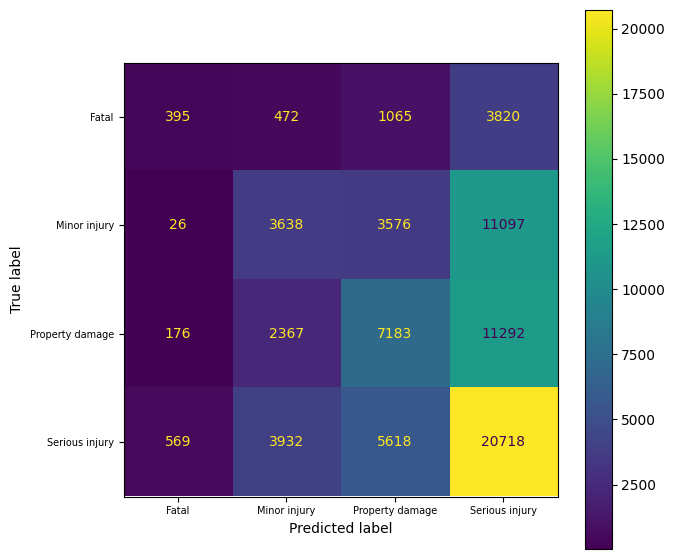

In [9]:
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=42)
param_grid = {
    'lgbmclassifier__n_estimators': [100]
}
grid_search = GridSearchCV(pipeline_tomek, param_grid, cv=rskf, scoring='accuracy', n_jobs=-1, verbose=0, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)
print("-------------------------------------------------------------")
print("Evaluation")
y_pred = grid_search.predict(X_test)
model_tomek = grid_search.best_estimator_
cv_results = grid_search.cv_results_
train_scores = cv_results['mean_train_score']
validation_scores = cv_results['mean_test_score']
print("Average training score: ", train_scores.mean())
print("Average validation score: ", validation_scores.mean())
evaluation_class_8(y_pred, y_test)
with open('Saved_models_remove/lgbm_tomek.pkl', 'wb') as file:
    pickle.dump(model_tomek, file)

In [3]:
print(395/1166)
print(3638/10409)
print(7183/17442)
print(20718/46927)

0.33876500857632935
0.3495052358535882
0.4118220387570233
0.4414942357278326
